In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#a)
fromage = pd.read_csv("fromage.csv", sep=", ")
print(fromage.head())


          "name"   "calories"   "sodium"   "calcium"   "lipides"   "retinol"   \
0  "CarredelEst"           314      353.5        72.6        26.3        51.6   
1      "Babybel"           314      238.0       209.8        25.1        63.7   
2     "Beaufort"           401      112.0       259.4        33.3        54.9   
3         "Bleu"           342      336.0       211.1        28.9        37.1   
4    "Camembert"           264      314.0       215.9        19.5       103.0   

   "folates"   "proteines"   "cholesterol"   "magnesium"  
0        30.3          21.0              70           20  
1         6.4          22.6              70           27  
2         1.2          26.6             120           41  
3        27.5          20.2              90           27  
4        36.4          23.4              60           20  


C:\Users\popst\AppData\Local\Temp\ipykernel_12548\1394792934.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fromage = pd.read_csv("fromage.csv", sep=", ")


In [7]:
#b)
#Affichez l'ecart-type, le min, max et les quartiles des differentes variables
print(fromage.describe())

       "calories"    "sodium"   "calcium"   "lipides"   "retinol"   \
count    29.000000   29.000000   29.000000   29.000000   29.000000   
mean    300.034483  210.086207  185.734483   24.158621   67.562069   
std      91.914356  108.678923   72.528882    8.129642   24.163098   
min      70.000000   22.000000   72.600000    3.400000   37.100000   
25%     292.000000  140.000000  132.900000   23.400000   51.600000   
50%     321.000000  223.000000  202.300000   26.300000   62.300000   
75%     355.000000  276.000000  220.500000   29.100000   76.400000   
max     406.000000  432.000000  334.600000   33.300000  150.500000   

       "folates"   "proteines"   "cholesterol"   "magnesium"  
count   29.000000     29.000000       29.000000    29.000000  
mean    13.010345     20.168966       74.586207    26.965517  
std     11.723339      6.959788       28.245755    11.318388  
min      1.200000      4.100000       10.000000    10.000000  
25%      4.900000     17.800000       70.000000    20.

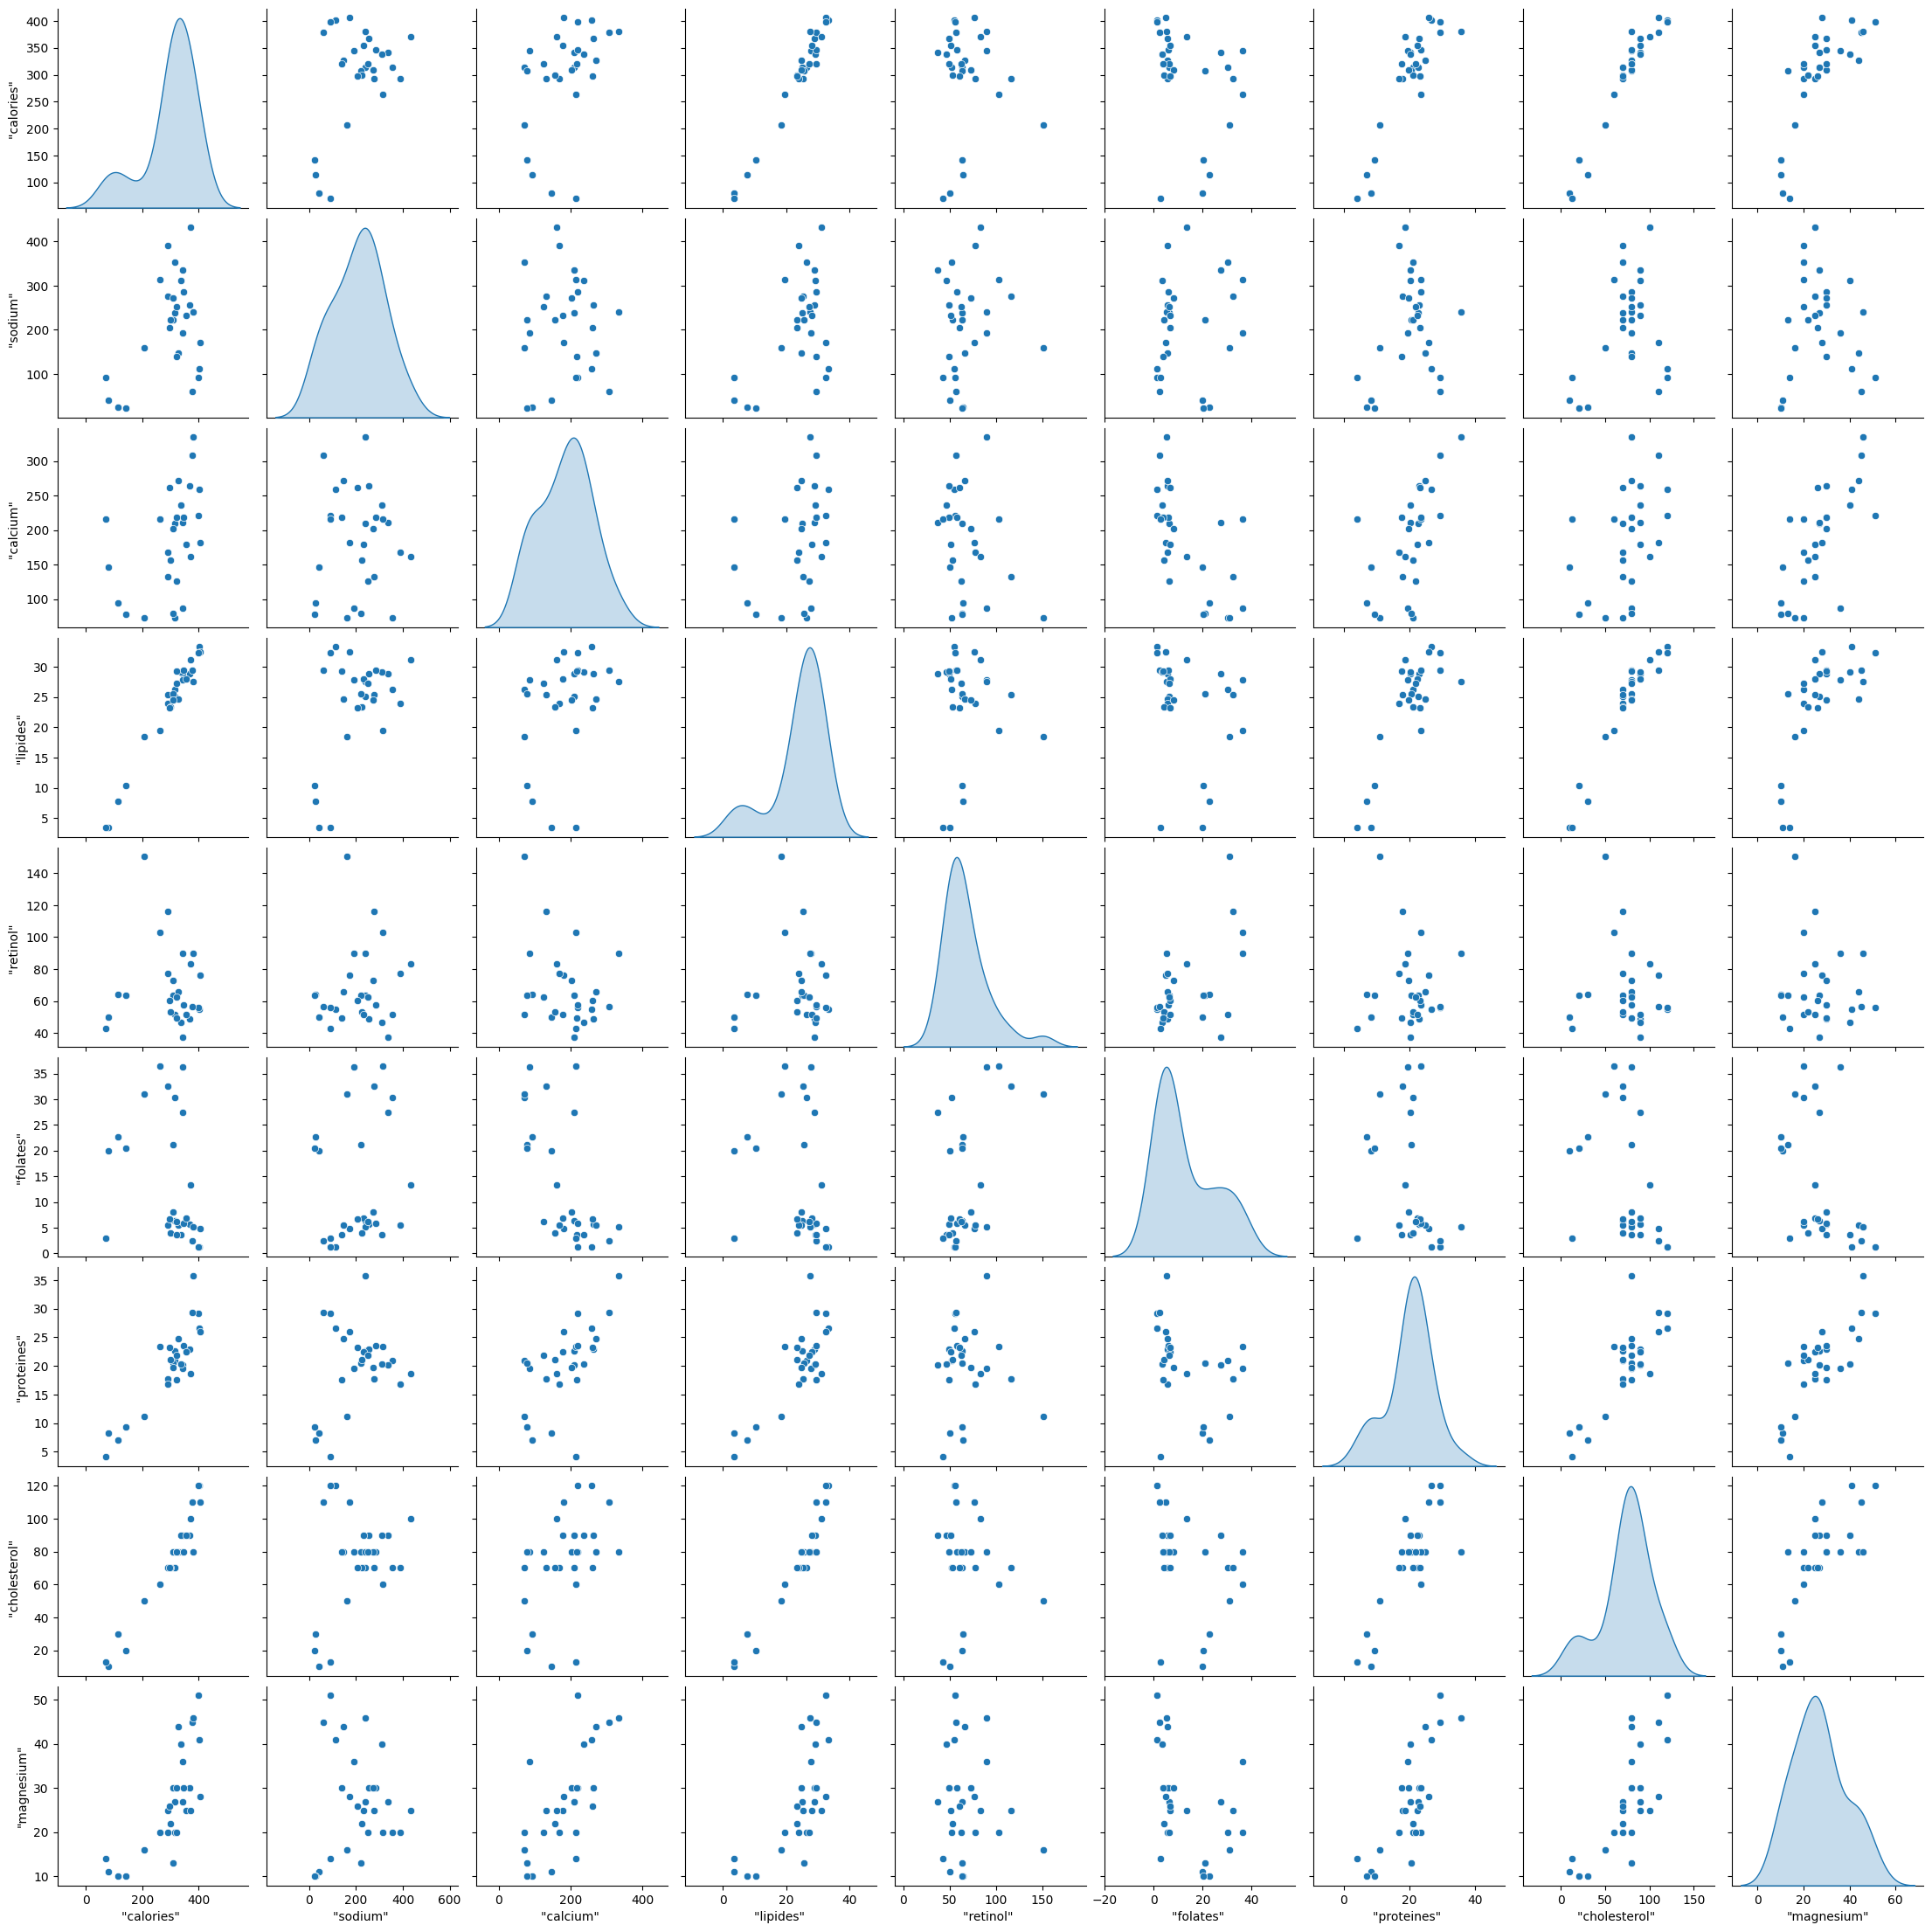

In [8]:
#c)
#Affichez le graph de croisement deux a deux(pariplot) de la librairie seaborn. Identifiez les variables correlees

sns.pairplot(fromage, diag_kind='kde')
plt.show()

Les variables le plus corellees sont:
calories - lipides 
calories - proteines
calories - cholesterol
lipides - cholesterol
proteines - lipides
proteines - cholesterol
proteines - magnesium
magnesium - cholesterol

<function matplotlib.pyplot.show(close=None, block=None)>

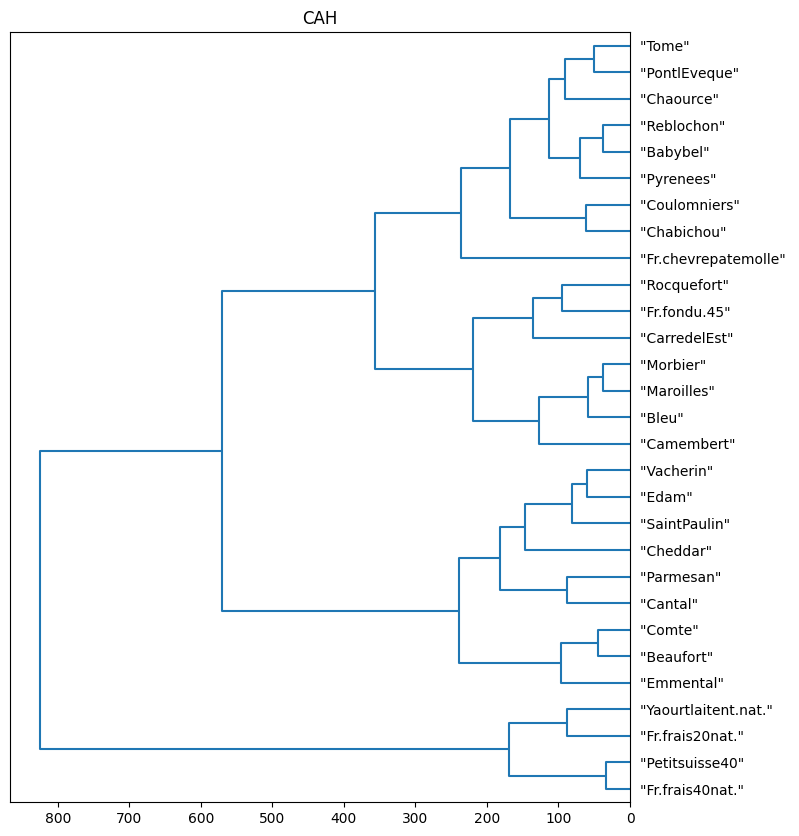

In [79]:
#fromage_without_name = fromage.drop(columns=['name'])

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pylab import rcParams
rcParams['figure.figsize'] = 8, 10

#extract everything but the first row
fromage_numeric = fromage.iloc[:, 1:]

#extract the first column (the row names) but without the first row
fromage_row_names = fromage.iloc[:, 0][1:]


#generate the linkage matrix      Ward method
Z = linkage(fromage_numeric, method='ward', metric='euclidean')
#plot the dendrogram
plt.title("CAH")
dendrogram(Z,labels = fromage['"name" '].values, orientation='left',color_threshold=0)
plt.show

Quel decoupage vous semble optimal(justifiez)?

Le decoupage optimal est de 4 clusters, car il y a une grande difference entre les distances des clusters 4 et 5.

On décide de faire un découpage en 4 groupes. Identifiez et décrivez les caractéristiques des quatres groupes.
Gr 1: 26,21,7,23,1,22,10,6,13
Gr 2: 24,14,0,18,17,3,4
Gr 3: 27,11,25,8,19,5,9,2,12
Gr 4: 28,15,20,16

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Approximate clusters by cutting the dendrogram at 4 clusters
fromage_numeric['cluster'] = fcluster(Z, t=4, criterion='maxclust')

# Display the mean values of each cluster
print(fromage_numeric.groupby('cluster').mean())

#Display the index of the cheeses in each cluster
for i in range(1, 5):
    print(f"Cluster {i}:")
    print(fromage_numeric[fromage_numeric['cluster'] == i].index.tolist())
    print()


         "calories"    "sodium"   "calcium"   "lipides"   "retinol"   \
cluster                                                                
1         101.750000   44.750000  133.750000    6.275000   55.150000   
2         364.222222  158.333333  257.800000   29.022222   61.955556   
3         323.857143  345.928571  183.685714   26.928571   65.271429   
4         305.444444  229.666667  138.366667   25.088889   80.466667   

         "folates"   "proteines"   "cholesterol"   "magnesium"  
cluster                                                         
1         16.475000      7.200000       18.250000    11.250000  
2          4.066667     26.166667       95.555556    37.888889  
3         17.485714     20.585714       80.000000    26.000000  
4         16.933333     19.611111       74.444444    23.777778  
Cluster 1:
[15, 16, 20, 28]

Cluster 2:
[2, 5, 8, 9, 11, 12, 19, 25, 27]

Cluster 3:
[0, 3, 4, 14, 17, 18, 24]

Cluster 4:
[1, 6, 7, 10, 13, 21, 22, 23, 26]



In [55]:
from scipy.cluster.hierarchy import fcluster

# Approximate clusters by cutting the dendrogram at 3 clusters
fromage_numeric['cluster'] = fcluster(Z, t=3, criterion='maxclust')

# Display the mean values of each cluster
print(fromage_numeric.groupby('cluster').mean())

#Display the index of the cheeses in each cluster
for i in range(1, 4):
    print(f"Cluster {i}:")
    print(fromage_numeric[fromage_numeric['cluster'] == i].index.tolist())
    print()

         "calories"    "sodium"   "calcium"   "lipides"   "retinol"   \
cluster                                                                
1         101.750000   44.750000   133.75000    6.275000   55.150000   
2         364.222222  158.333333   257.80000   29.022222   61.955556   
3         313.500000  280.531250   158.19375   25.893750   73.818750   

         "folates"   "proteines"   "cholesterol"   "magnesium"  
cluster                                                         
1         16.475000      7.200000       18.250000    11.250000  
2          4.066667     26.166667       95.555556    37.888889  
3         17.175000     20.037500       76.875000    24.750000  
Cluster 1:
[15, 16, 20, 28]

Cluster 2:
[2, 5, 8, 9, 11, 12, 19, 25, 27]

Cluster 3:
[0, 1, 3, 4, 6, 7, 10, 13, 14, 17, 18, 21, 22, 23, 24, 26]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#a)
iris = pd.read_csv("Iris.csv", sep=", ")
print(iris.head())

  Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0                      1,5.1,3.5,1.4,0.2,Iris-setosa              
1                      2,4.9,3.0,1.4,0.2,Iris-setosa              
2                      3,4.7,3.2,1.3,0.2,Iris-setosa              
3                      4,4.6,3.1,1.5,0.2,Iris-setosa              
4                      5,5.0,3.6,1.4,0.2,Iris-setosa              


C:\Users\popst\AppData\Local\Temp\ipykernel_12548\3457394436.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  iris = pd.read_csv("Iris.csv", sep=", ")


In [57]:
#b)
#Affichez l'ecart-type, le min, max et les quartiles des differentes variables
print(iris.describe())

       Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count                                                 150              
unique                                                150              
top                         1,5.1,3.5,1.4,0.2,Iris-setosa              
freq                                                    1              


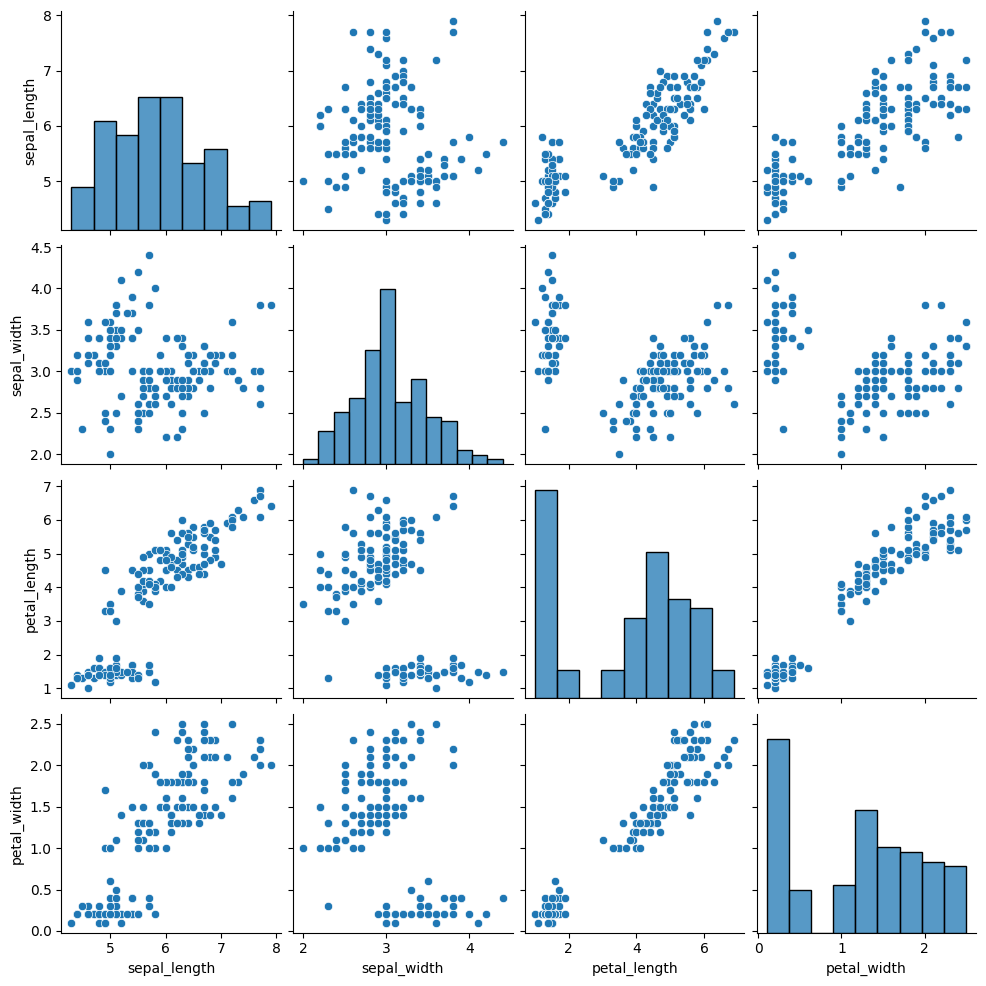

In [60]:
#c)
#Affichez le graph de croisement deux a deux(pariplot) de la librairie seaborn. Identifiez les variables correlees
iris = sns.load_dataset("iris")
sns.pairplot(iris)
plt.show()

Les variables le plus correlees sont:
sepal_length - petal_length
petal_width - petal_length
sepal_length - petal_width

In [65]:
from sklearn.cluster import KMeans
import random
random.seed(10)
#Cluster K-means
model = KMeans(n_clusters=2, random_state=0)
#adapter le modele de donnees
model.fit(iris[['sepal_length', 'sepal_width','petal_length','petal_width']])
res_label = model.labels_
res_label
#array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype =int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
#On ajoute une colonne qui contiendra le cluster choisi par kmeans
iris.insert(5,"kmeansClass",model.labels_, True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,kmeansClass
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


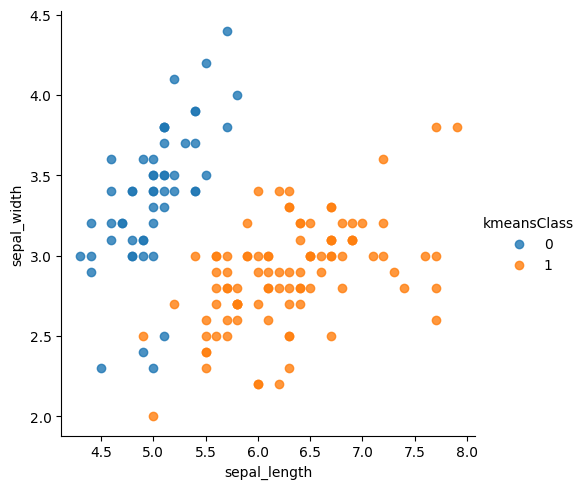

In [69]:
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='kmeansClass', fit_reg=False)
plt.show()


Non, K-means ne peut pas utiliser des variables categorielles pour construire les groupes parce quoi K-means doit utiliser seulement des variables numeriques.

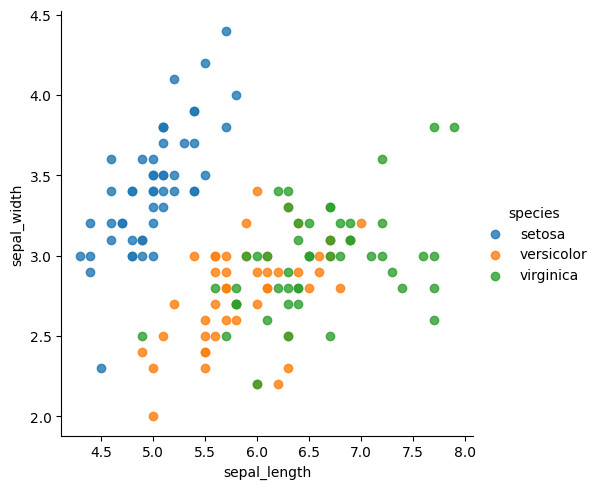

In [ ]:
#Affichez à l’aide de la fonction lmplot et variable 'sepal_length' en fonction de ’sepal_width’, avec comme couleur de point la variable ’Species’. Comparez avec le graphe 2.3. Combien d’espèces y-a-t-il vraiment d’espèce dans ce jeux de données?
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='species', fit_reg=False)
plt.show()

#Il y a 3 espèces dans ce jeux de donnees. Mais il semble qu'il y ait 2 clusters dans le jeu de données.

In [84]:
#Réalisez un k-means avec le nombre de classe égale au vrais nombre d’espèce
model = KMeans(n_clusters=3, random_state=0)
#adapter le modele de donnees
model.fit(iris[['sepal_length', 'sepal_width','petal_length','petal_width']])
res_label = model.labels_
res_label

#Comparer ce clustering proposé par rapport aux vrais espèces. Sur quels espèces k-means est il en difficulté? Pour cela utilisez la fonction crosstab.
comparison = pd.crosstab(iris['species'], res_label, rownames=['Actual'], colnames=['Predicted'])
print(comparison)



Predicted    0   1   2
Actual                
setosa       0  50   0
versicolor  47   0   3
virginica   14   0  36


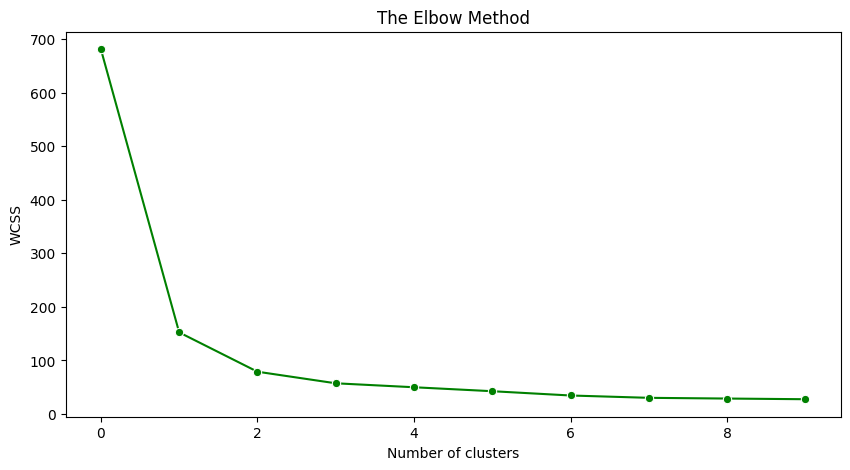

In [87]:
#to store WCSS
wcss = []
for i in range(1,11):
    #k-mean cluster model for different k values
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(iris[['sepal_length', 'sepal_width','petal_length','petal_width']])
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(wcss, marker='o', color='green')

#labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Le nombre de clusters est 3, car c'est le point ou la courbe commence a se stabiliser.

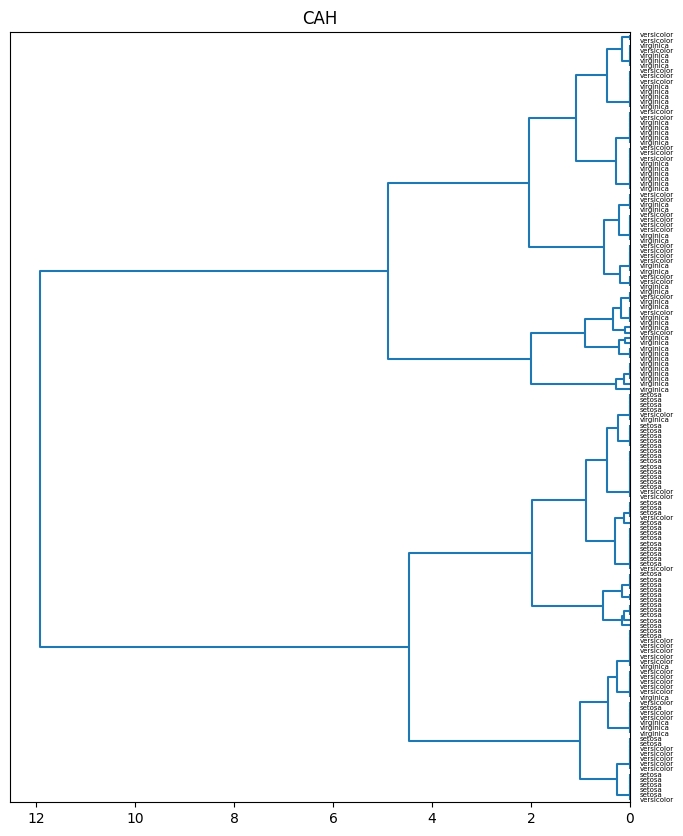

In [92]:
#Realisez une C.H.A sur le dataset Iris et comparer avec k-means a l'aide d'une matrice de confusion
#Pour obtenir les donnees labelisees avec une CHA vous pouvez utiliser la fonction fcluster
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from pylab import rcParams
rcParams['figure.figsize'] = 8, 10
#extract everything but the first row
iris_numeric = iris.iloc[:, :1]
#generate the linkage matrix      Ward method
Z = linkage(iris_numeric, method='ward', metric='euclidean')
#plot the dendrogram
plt.title("CAH")
dendrogram(Z,labels = iris['species'].values, orientation='left',color_threshold=0)
plt.show()


In [ ]:
#Conclure sur les différences entre les deux méthodes de clustering pour le dataset Iris1.

#La méthode K-means et la méthode CAH donnent des résultats similaires, mais la méthode CAH est plus adaptée pour visualiser les relations hiérarchiques entre les clusters. K-means est plus rapide et efficace pour de grands ensembles de données, tandis que CAH est plus informative pour des ensembles de données plus petits. Les deux méthodes peuvent être utilisées ensemble pour une meilleure compréhension des données.
#K-means est plus sensible aux valeurs aberrantes, tandis que CAH peut mieux gérer ces valeurs. En fin de compte, le choix de la méthode dépend des objectifs de l'analyse et des caractéristiques des données.
